# SABR Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sabr as mysabr

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Change alpha_0

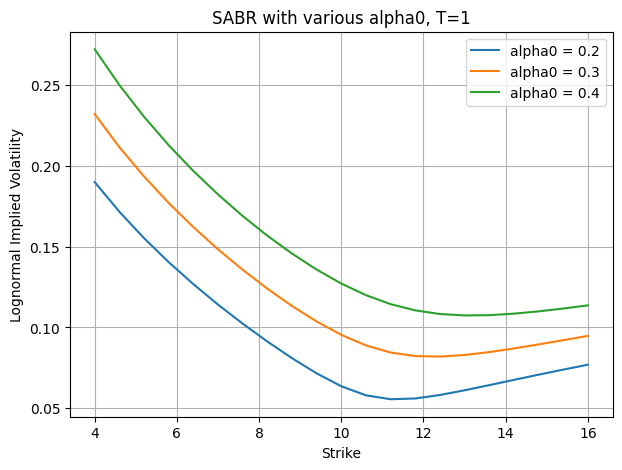

In [2]:
forward = 10; alpha0s = [0.2, 0.3, 0.4]; beta = 0.5; corr = -0.5; vol_of_vol = 0.4
forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks

for alpha0 in alpha0s:           
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]    
    df['alpha0 = ' + str(alpha0)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various alpha0, T=1")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR1.png")
plt.show()

### Change beta

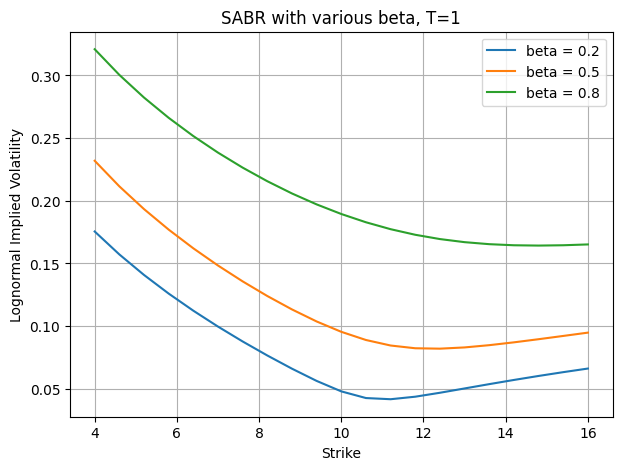

In [3]:
forward = 10; alpha0 = 0.3; betas = [0.2, 0.5, 0.8]; corr = -0.5; vol_of_vol = 0.4
forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks

for beta in betas:       
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]          
    df['beta = ' + str(beta)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various beta, T=1")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR2.png")
plt.show()

### Adjust $\alpha_0$ when changing beta such that we have approximately the same ATM vol

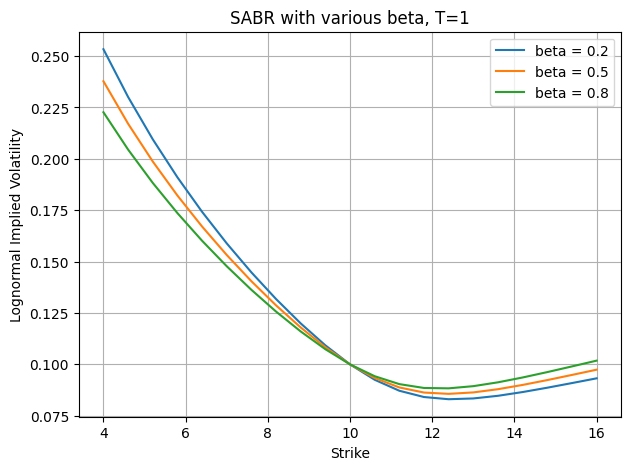

In [4]:
forward = 10; betas = [0.2, 0.5, 0.8]; corr = -0.5; vol_of_vol = 0.4
forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks
ATMvol = 0.1

for beta in betas:       
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol) 
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]        
    df['beta = ' + str(beta)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various beta, T=1")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR3.png")
plt.show()

### Change correlation

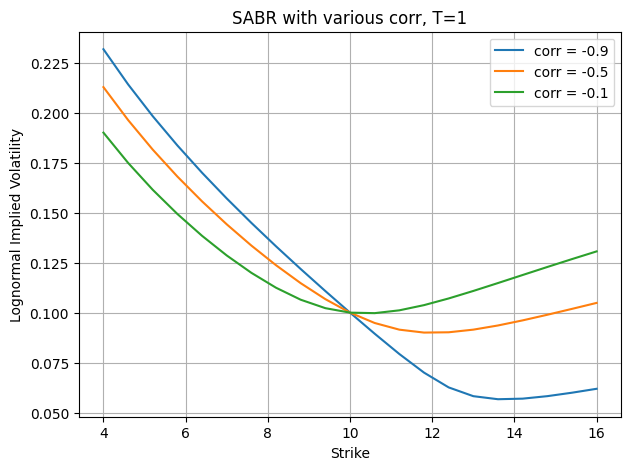

In [5]:
forward = 10; beta = 1; corrs = [-0.9, -0.5, -0.1]; vol_of_vol = 0.4
forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks

for corr in corrs:       
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol) 
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]          
    df['corr = ' + str(corr)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various corr, T=1")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR4.png")
plt.show()

### 0 vol of vol when changing correlation

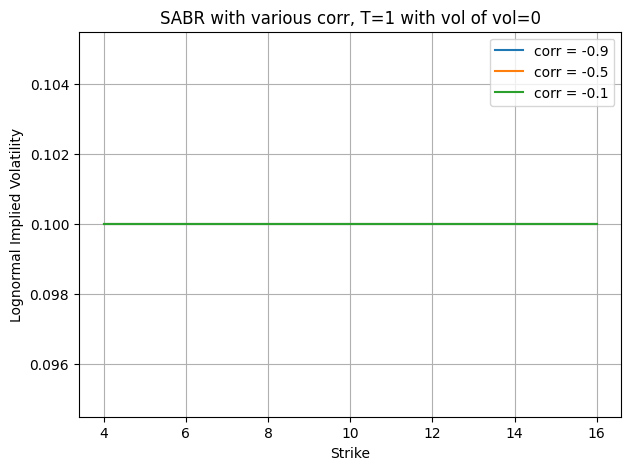

In [6]:
forward = 10; beta = 1; corrs = [-0.9, -0.5, -0.1]; vol_of_vol = 0.0000
forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks

for corr in corrs:       
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol) 
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]          
    df['corr = ' + str(corr)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various corr, T=1 with vol of vol=0")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR41.png")
plt.show()

### changing vol of vol

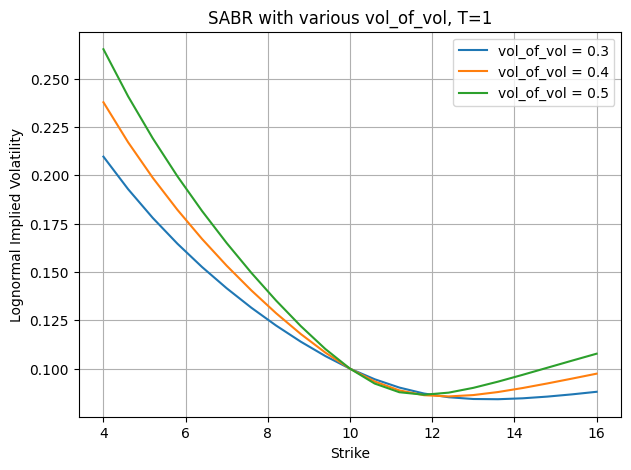

In [7]:
forward = 10; alpha0 = 0.3; beta = 0.5; corr = -0.5; vol_of_vols = [0.3, 0.4, 0.5]

forward, T = 10, 1
Ks = np.linspace(4, 16, 21)
df = pd.DataFrame()
df['Strike'] = Ks

for vol_of_vol in vol_of_vols:  
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol) 
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]          
    df['vol_of_vol = ' + str(vol_of_vol)] = np.array(ivols)

df = df.set_index('Strike')
df.plot(grid=True, figsize=(7, 5))
plt.title("SABR with various vol_of_vol, T=1")
plt.xlabel("Strike")
plt.ylabel("Lognormal Implied Volatility")

#plt.savefig("L4_FigSABR5.png")
plt.show()

### Issues with SABR

<Axes: title={'center': 'SABR Implied Distribution'}, xlabel='Strike'>

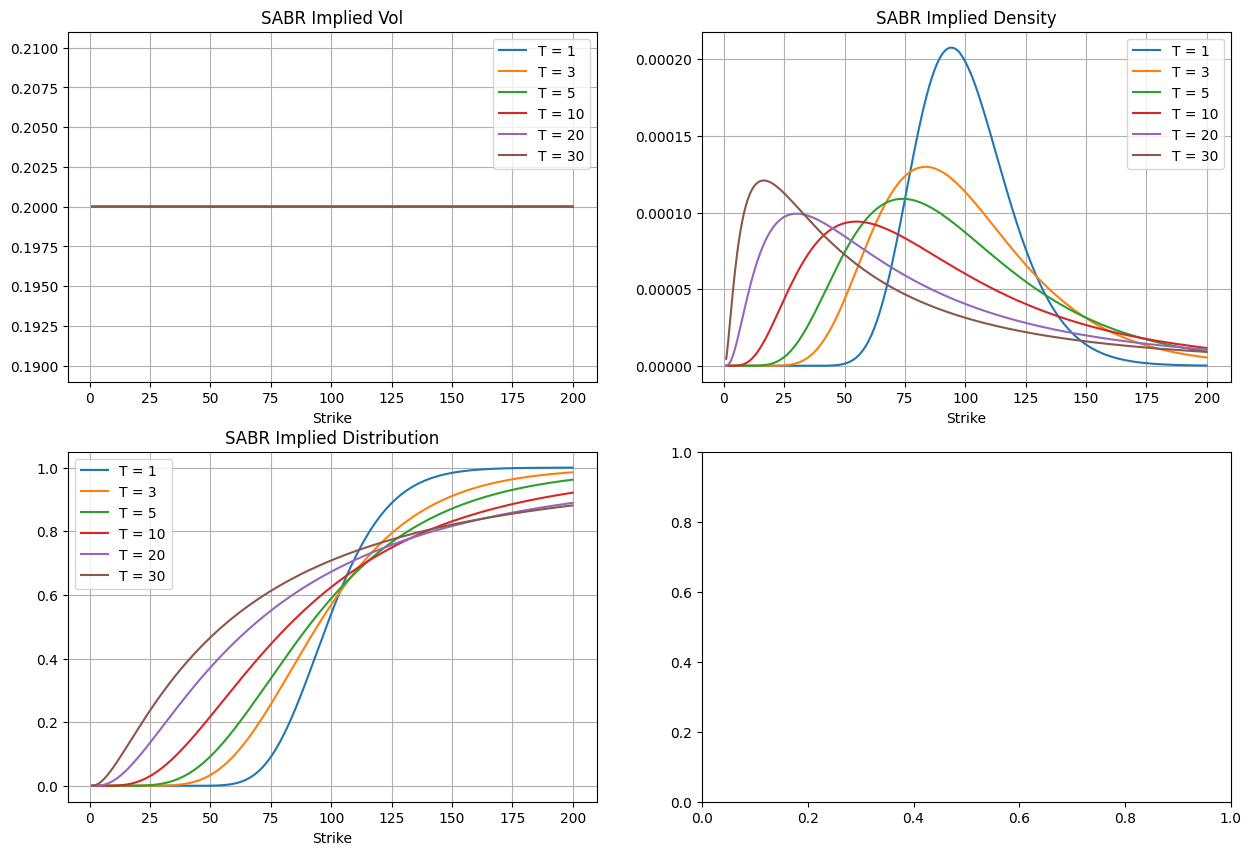

In [8]:
ATMvol = 0.2; beta = 1; corr = 0; vol_of_vol = 0
forward = 100
Ts = [1, 3, 5, 10, 20, 30]
epsilon = 0.1
step_size = epsilon
min_K = 1
max_K = 200
Ks = np.arange(min_K, max_K, step_size)
df_density = pd.DataFrame(); df_density['Strike'] = Ks
df_prob = pd.DataFrame(); df_prob['Strike'] = Ks
df_ivol = pd.DataFrame(); df_ivol['Strike'] = Ks
DF = 1.0

for T in Ts:
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol)     
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_ivol['T = ' + str(T)] = np.array(ivols)  
        
    prob = [mysabr.sabr_digiput(forward, K, epsilon, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_prob['T = ' + str(T)] = np.array(prob)     
    
    density = [mysabr.sabr_butterfly(forward, K, epsilon, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_density['T = ' + str(T)] = np.array(density)    

df_ivol = df_ivol.set_index('Strike')
df_prob = df_prob.set_index('Strike')
df_density = df_density.set_index('Strike')

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('SABR Implied Vol')
df_ivol.plot(ax=axes[0,0], grid=True, figsize=(15, 10))

axes[0,1].set_title('SABR Implied Density')
df_density.plot(ax=axes[0,1], grid=True, figsize=(15, 10))

axes[1,0].set_title('SABR Implied Distribution')
df_prob.plot(ax=axes[1,0], grid=True, figsize=(15, 10))

#fig.savefig("L4_FigSABR6_1.png")

### When will we start seeing negative density

<Axes: title={'center': 'SABR Implied Distribution'}, xlabel='Strike'>

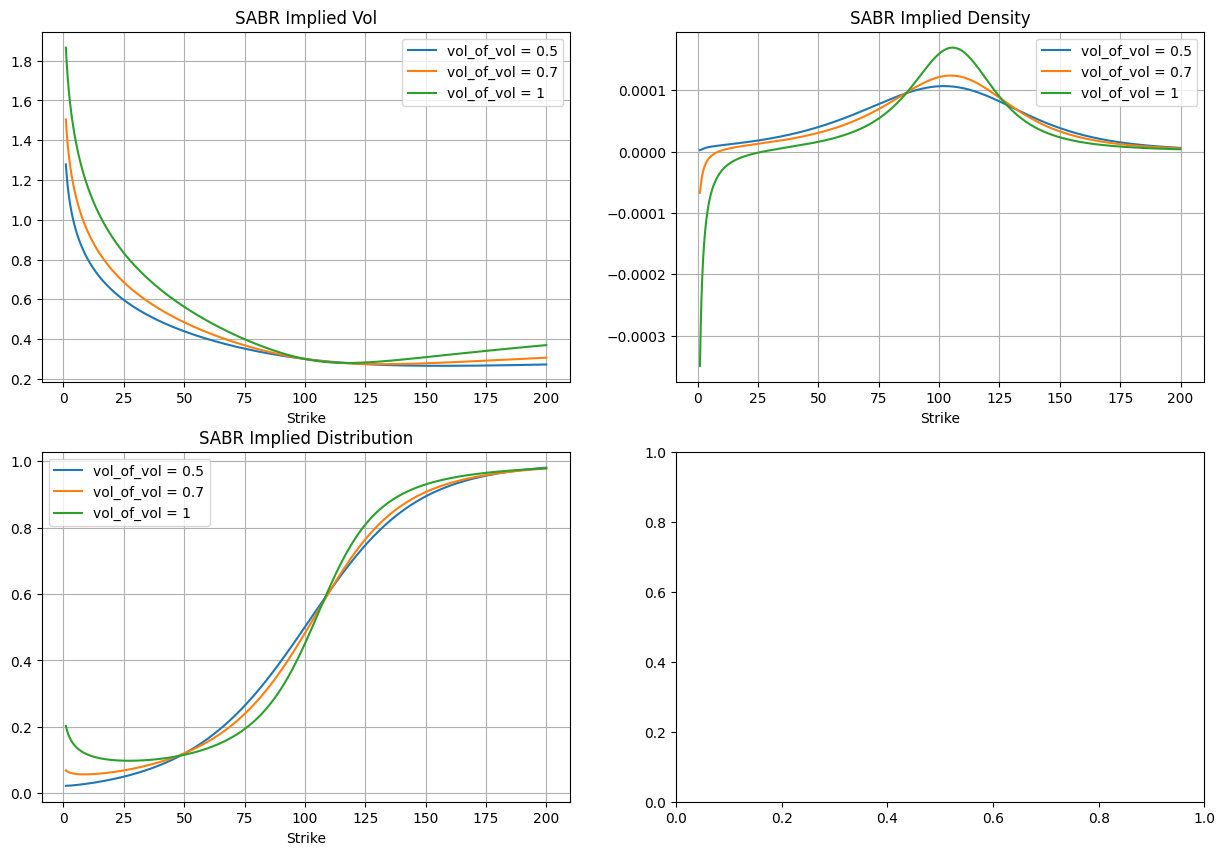

In [9]:
ATMvol = 0.3; beta = 0.5; corr = -0.3; vol_of_vols = [0.5, 0.7, 1]
forward = 100
T = 2
epsilon = 0.1
step_size = epsilon
min_K = 1
max_K = 200
Ks = np.arange(min_K, max_K, step_size)
df_density = pd.DataFrame(); df_density['Strike'] = Ks
df_prob = pd.DataFrame(); df_prob['Strike'] = Ks
df_ivol = pd.DataFrame(); df_ivol['Strike'] = Ks
DF = 1.0

for vol_of_vol in vol_of_vols:
    alpha0 = mysabr.find_alpha(ATMvol, forward, T, beta, corr, vol_of_vol)     
    ivols = [mysabr.sabr_lognormal_vol(K, forward, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_ivol['vol_of_vol = ' + str(vol_of_vol)] = np.array(ivols)  
        
    prob = [mysabr.sabr_digiput(forward, K, epsilon, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_prob['vol_of_vol = ' + str(vol_of_vol)] = np.array(prob)     
    
    density = [mysabr.sabr_butterfly(forward, K, epsilon, T, alpha0, beta, corr, vol_of_vol) for K in Ks]
    df_density['vol_of_vol = ' + str(vol_of_vol)] = np.array(density)    

df_ivol = df_ivol.set_index('Strike')
df_prob = df_prob.set_index('Strike')
df_density = df_density.set_index('Strike')

fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set_title('SABR Implied Vol')
df_ivol.plot(ax=axes[0,0], grid=True, figsize=(15, 10))

axes[0,1].set_title('SABR Implied Density')
df_density.plot(ax=axes[0,1], grid=True, figsize=(15, 10))

axes[1,0].set_title('SABR Implied Distribution')
df_prob.plot(ax=axes[1,0], grid=True, figsize=(15, 10))

#fig.savefig("L4_FigSABR7.png")